In [ ]:
import os
!pip install -q kaggle

if not os.path.exists("/root/.kaggle/kaggle.json"):
    from google.colab import files
    print("Upload your kaggle.json file from your Kaggle account")
    files.upload()
    !mkdir -p ~/.kaggle
    !mv kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
else:
    print("kaggle.json already configured")

if not os.path.exists("accepted_2007_to_2018Q4.csv.gz"):
    print("Downloading Lending Club dataset...")
    !kaggle datasets download -d wordsforthewise/lending-club -q
    !unzip -q lending-club.zip
    print("Dataset downloaded & extracted")
else:
    print("Dataset already available")

✅ kaggle.json already configured
✅ Dataset already available


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    roc_auc_score,
    f1_score,
    classification_report,
    confusion_matrix
)


import warnings

warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv("accepted_2007_to_2018Q4.csv.gz", low_memory=False, nrows=200000)

In [ ]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(200000, 151)

In [ ]:
df.info

<bound method DataFrame.info of               id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0       68407277        NaN     3600.0       3600.0           3600.0   
1       68355089        NaN    24700.0      24700.0          24700.0   
2       68341763        NaN    20000.0      20000.0          20000.0   
3       66310712        NaN    35000.0      35000.0          35000.0   
4       68476807        NaN    10400.0      10400.0          10400.0   
...          ...        ...        ...          ...              ...   
199995  56080425        NaN    12000.0      12000.0          12000.0   
199996  55909672        NaN    21000.0      21000.0          21000.0   
199997  54414556        NaN    27500.0      27500.0          27500.0   
199998  56109383        NaN     7000.0       7000.0           7000.0   
199999  56129522        NaN    23000.0      23000.0          23000.0   

              term  int_rate  installment grade sub_grade  ...  \
0        36 months     13.99       123.03     C        C4  ...   
1        36 months     11.99       820.28     C        C1  ...   
2        60 months     10.78       432.66     B        B4  ...   
3        60 months     14.85       829.90     C        C5  ...   
4        60 months     22.45       289.91     F        F1  ...   
...            ...       ...          ...   ...       ...  ...   
199995   36 months     12.69       402.54     C        C2  ...   
199996   36 months     12.29       700.42     C        C1  ...   
199997   60 months     14.65       649.19     C        C5  ...   
199998   36 months     10.99       229.14     B        B4  ...   
199999   60 months     13.99       535.06     C        C4  ...   

       hardship_payoff_balance_amount hardship_last_payment_amount  \
0                                 NaN                          NaN   
1                                 NaN                          NaN   
2                                 NaN                          NaN   
3                                 NaN                          NaN   
4                                 NaN                          NaN   
...                               ...                          ...   
199995                            NaN                          NaN   
199996                            NaN                          NaN   
199997                            NaN                          NaN   
199998                            NaN                          NaN   
199999                            NaN                          NaN   

       disbursement_method  debt_settlement_flag debt_settlement_flag_date  \
0                     Cash                     N                       NaN   
1                     Cash                     N                       NaN   
2                     Cash                     N                       NaN   
3                     Cash                     N                       NaN   
4                     Cash                     N                       NaN   
...                    ...                   ...                       ...   
199995                Cash                     N                       NaN   
199996                Cash                     N                       NaN   
199997                Cash                     N                       NaN   
199998                Cash                     N                       NaN   
199999                Cash                     N                       NaN   

       settlement_status settlement_date settlement_amount  \
0                    NaN             NaN               NaN   
1                    NaN             NaN               NaN   
2                    NaN             NaN               NaN   
3                    NaN             NaN               NaN   
4                    NaN             NaN               NaN   
...                  ...             ...               ...   
199995               NaN             NaN               NaN   
199996               NaN            

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
reward_features = ['loan_amnt', 'int_rate']

X_test_reward_features = X_test[reward_features].copy()
X_train_reward_features = X_train[reward_features].copy()

X_train = X_train[features]
X_test = X_test[features]

In [ ]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])


X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

feature_names = (
    num_cols +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols))
)

# Convert to dense arrays if they are sparse (Keras prefers dense)
if hasattr(X_train_processed, "toarray"):
    X_train_processed = X_train_processed.toarray()
    X_test_processed = X_test_processed.toarray()

print(f"Processed training data shape: {X_train_processed.shape}")
print(f"Processed test data shape: {X_test_processed.shape}")

Processed training data shape: (140866, 76)
Processed test data shape: (35217, 76)


In [ ]:
input_dim = X_train_processed.shape[1]

In [ ]:
model = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.BatchNormalization(),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.BatchNormalization(),

    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_2           │ (None, 76)             │           304 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,601 (29.69 KB)

 Trainable params: 7,321 (28.60 KB)

 Non-trainable params: 280 (1.09 KB)

In [ ]:
neg, pos = np.bincount(y_train)
total = neg + pos
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Class weights: {{0: {weight_for_0:.2f}, 1: {weight_for_1:.2f}}}")

Class weights: {0: 0.62, 1: 2.51}


In [ ]:
early_stopping = EarlyStopping(
    monitor='val_auc',
    patience=3,
    mode='max',
    restore_best_weights=True
)

history = model.fit(
    X_train_processed,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_test_processed, y_test),
    class_weight=class_weight,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.5383 - auc: 0.6136 - loss: 0.7255 - val_accuracy: 0.7094 - val_auc: 0.7272 - val_loss: 0.5738
Epoch 2/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.6539 - auc: 0.7066 - loss: 0.6294 - val_accuracy: 0.6873 - val_auc: 0.7305 - val_loss: 0.5807
Epoch 3/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6706 - auc: 0.7229 - loss: 0.6158 - val_accuracy: 0.6786 - val_auc: 0.7317 - val_loss: 0.5929
Epoch 4/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6676 - auc: 0.7274 - loss: 0.6117 - val_accuracy: 0.6728 - val_auc: 0.7323 - val_loss: 0.5964
Epoch 5/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6670 - auc: 0.7275 - loss: 0.6123 - val_accuracy: 0.6749 - val_auc: 0.7325 - val_loss: 0.5836
Epoch 6/20
276/276 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6651 - auc: 0.7276 - loss: 0.6111 - val_accuracy: 0.6750 - val_auc: 0.7327 - val_loss: 0.5945
Epoch 7/20
276/276 ━━━━━━━━━━━━━━━━

1101/1101 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Test AUC (Area Under the ROC Curve): 0.7342
Test F1-Score (at 0.5 threshold): 0.4467

Classification Report:
                precision    recall  f1-score   support

Fully Paid (0)       0.89      0.66      0.76     28199
 Defaulted (1)       0.33      0.68      0.45      7018

      accuracy                           0.66     35217
     macro avg       0.61      0.67      0.60     35217
  weighted avg       0.78      0.66      0.70     35217


Confusion Matrix:


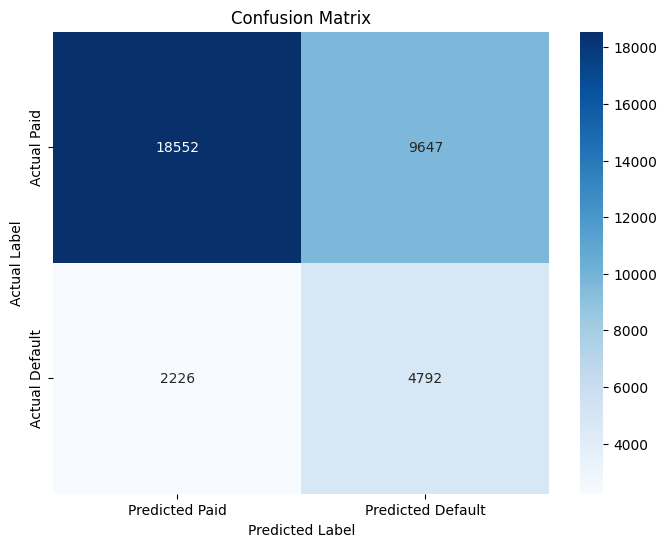

Model saved.


In [ ]:
y_pred_proba = model.predict(X_test_processed).flatten()
y_pred_class = (y_pred_proba > 0.5).astype(int)


auc = roc_auc_score(y_test, y_pred_proba)
print(f"Test AUC (Area Under the ROC Curve): {auc:.4f}")


f1 = f1_score(y_test, y_pred_class)
print(f"Test F1-Score (at 0.5 threshold): {f1:.4f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred_class, target_names=['Fully Paid (0)', 'Defaulted (1)']))


print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Paid', 'Predicted Default'],
            yticklabels=['Actual Paid', 'Actual Default'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

model.save('dl_model.h5')
print("Model saved.")

Displaying training history plots...


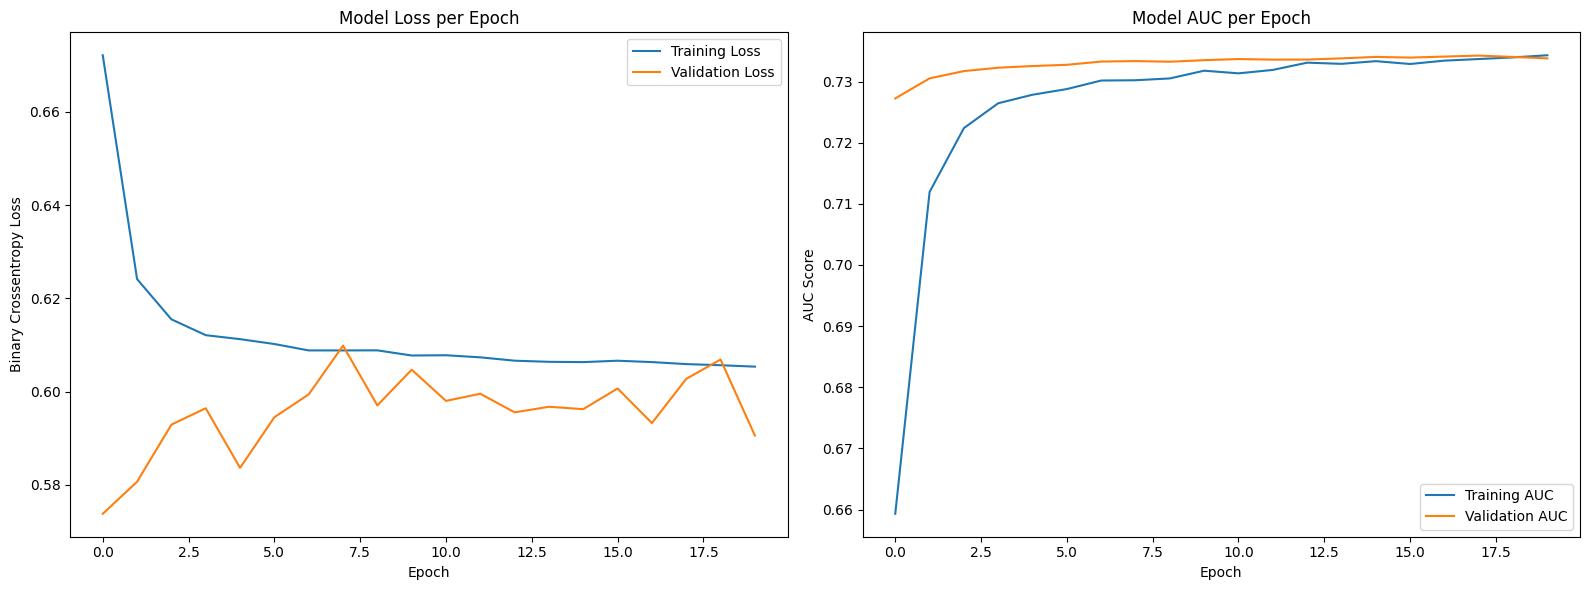

In [ ]:
print("Displaying training history plots...")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss per Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Binary Crossentropy Loss')
ax1.legend()

# Plot 2: AUC
ax2.plot(history.history['auc'], label='Training AUC')
ax2.plot(history.history['val_auc'], label='Validation AUC')
ax2.set_title('Model AUC per Epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('AUC Score')
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
np.savez_compressed(
    'task_3_data.npz',
    X_train_processed=X_train_processed,
    y_train=y_train,
    X_test_processed=X_test_processed,
    y_test=y_test,
    X_train_reward_features=X_train_reward_features.values,
    X_test_reward_features=X_test_reward_features.values,
    feature_names=feature_names
)
print("Data saved to 'task_3_data.npz'.")

Data saved to 'task_3_data.npz'.
